<a href="https://colab.research.google.com/github/catydiaz4863/Machine-Learning/blob/master/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#hwk_1

In [6]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Sep 27 19:54:18 2021

@author: catalinadiaz
"""

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import pathlib
import matplotlib.pyplot as plt
import numpy as np

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [9]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [22]:
fid = drive.ListFile({'q':"title='data.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('data.zip')

In [ ]:
A

In [23]:
!unzip data.zip

Archive:  data.zip
   creating: data/
replace __MACOSX/._data? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: __MACOSX/._data         
  inflating: data/.DS_Store          
  inflating: __MACOSX/data/._.DS_Store  
   creating: data/hamster/
  inflating: __MACOSX/data/._hamster  
   creating: data/mouse/
  inflating: __MACOSX/data/._mouse   
  inflating: data/hamster/63.jpg     
  inflating: data/hamster/189.jpg    
  inflating: __MACOSX/data/hamster/._189.jpg  
  inflating: data/hamster/77.jpg     
  inflating: data/hamster/162.jpg    
  inflating: __MACOSX/data/hamster/._162.jpg  
  inflating: data/hamster/176.jpg    
  inflating: __MACOSX/data/hamster/._176.jpg  
  inflating: data/hamster/88.jpg     
  inflating: data/hamster/200.jpg    
  inflating: __MACOSX/data/hamster/._200.jpg  
  inflating: data/hamster/177.jpg    
  inflating: __MACOSX/data/hamster/._177.jpg  
  inflating: data/hamster/89.jpg     
  inflating: data/hamster/163.jpg    
  inflating: __MACOSX/data/hamster/.

In [24]:
data_dir = '/content/data'

In [25]:
from pathlib import Path


In [26]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "training",
    seed=123,
    image_size=(256, 256),
    batch_size=64
    )

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(256,256),
    batch_size=64
    )
class_names = train_ds.class_names
print(class_names)

Found 2309 files belonging to 2 classes.
Using 1848 files for training.
Found 2309 files belonging to 2 classes.
Using 461 files for validation.
['hamster', 'mouse']


Epoch 1/100
29/29 [==============================] - 13s 377ms/step - loss: 0.3634 - accuracy: 0.9042 - val_loss: 0.4072 - val_accuracy: 0.9089
Epoch 2/100
29/29 [==============================] - 10s 344ms/step - loss: 0.3136 - accuracy: 0.9140 - val_loss: 0.4195 - val_accuracy: 0.9089
Epoch 3/100
29/29 [==============================] - 10s 344ms/step - loss: 0.3102 - accuracy: 0.9140 - val_loss: 0.4122 - val_accuracy: 0.9089
Epoch 4/100
29/29 [==============================] - 10s 342ms/step - loss: 0.3045 - accuracy: 0.9140 - val_loss: 0.4015 - val_accuracy: 0.9089
Epoch 5/100
29/29 [==============================] - 10s 342ms/step - loss: 0.3006 - accuracy: 0.9140 - val_loss: 0.3788 - val_accuracy: 0.9089
Epoch 6/100
29/29 [==============================] - 10s 342ms/step - loss: 0.2952 - accuracy: 0.9140 - val_loss: 0.3659 - val_accuracy: 0.9089
Epoch 7/100
29/29 [==============================] - 10s 340ms/step - loss: 0.2931 - accuracy: 0.9140 - val_loss: 0.3559 - val_accuracy:

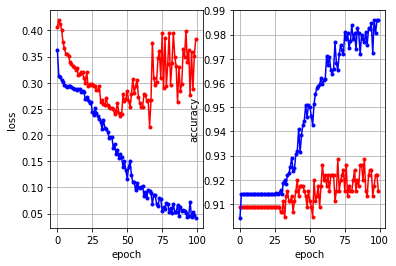

In [27]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(64, 3, padding="same", activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(64, 3, padding="same", activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(64, 3, padding="same", activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(32, 3, padding="same", activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(32, 3, padding="same", activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(32, 3, padding="same", activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(32, 3, padding="same", activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(2)
    ])
    
model.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(train_ds, validation_data=val_ds, epochs=100)
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
y_acc = history.history['accuracy']
y_vacc = history.history['val_accuracy']

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(np.arange(len(y_vloss)), y_vloss, marker='.', c='red')
ax1.plot(np.arange(len(y_loss)), y_loss, marker='.', c='blue')
ax1.grid()
plt.setp(ax1, xlabel='epoch', ylabel='loss')

ax2.plot(np.arange(len(y_vacc)), y_vacc, marker='.', c='red')
ax2.plot(np.arange(len(y_acc)), y_acc, marker='.', c='blue')
ax2.grid()
plt.setp(ax2, xlabel='epoch', ylabel='accuracy')

plt.show()

# hwk_2

In [94]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import pathlib
import matplotlib.pyplot as plt
import numpy as np

In [96]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [98]:
fid = drive.ListFile({'q':"title='data_2.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('data_2.zip')

In [99]:
!unzip data_2.zip

Archive:  data_2.zip
   creating: data_2/
  inflating: __MACOSX/._data_2       
   creating: data_2/apple/
  inflating: __MACOSX/data_2/._apple  
  inflating: data_2/.DS_Store        
  inflating: __MACOSX/data_2/._.DS_Store  
   creating: data_2/cherry/
  inflating: __MACOSX/data_2/._cherry  
   creating: data_2/tomato/
  inflating: __MACOSX/data_2/._tomato  
  inflating: data_2/apple/63.jpg     
  inflating: data_2/apple/823.jpg    
  inflating: data_2/apple/189.jpg    
  inflating: data_2/apple/77.jpg     
  inflating: data_2/apple/837.jpg    
  inflating: data_2/apple/638.jpg    
  inflating: data_2/apple/604.jpg    
  inflating: data_2/apple/162.jpg    
  inflating: data_2/apple/176.jpg    
  inflating: data_2/apple/88.jpg     
  inflating: data_2/apple/610.jpg    
  inflating: data_2/apple/348.jpg    
  inflating: data_2/apple/360.jpg    
  inflating: data_2/apple/406.jpg    
  inflating: data_2/apple/412.jpg    
  inflating: data_2/apple/374.jpg    
  inflating: data_2/apple/599

In [100]:
data_dir = '/content/data_2'
from pathlib import Path
data_dir = pathlib.Path(data_dir)

In [101]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "training",
    seed=123,
    image_size=(256, 256),
    batch_size=64
    )

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(256,256),
    batch_size=64
    )
class_names = train_ds.class_names
print(class_names)




Found 3304 files belonging to 3 classes.
Using 2644 files for training.
Found 3304 files belonging to 3 classes.
Using 660 files for validation.
['apple', 'cherry', 'tomato']


In [104]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [105]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Epoch 1/100
42/42 [==============================] - 16s 344ms/step - loss: 1.0965 - accuracy: 0.3627 - val_loss: 1.0907 - val_accuracy: 0.4470
Epoch 2/100
42/42 [==============================] - 14s 337ms/step - loss: 1.0805 - accuracy: 0.4346 - val_loss: 1.0724 - val_accuracy: 0.3818
Epoch 3/100
42/42 [==============================] - 14s 335ms/step - loss: 0.9641 - accuracy: 0.5586 - val_loss: 0.9221 - val_accuracy: 0.5848
Epoch 4/100
42/42 [==============================] - 14s 335ms/step - loss: 0.8485 - accuracy: 0.6293 - val_loss: 0.8672 - val_accuracy: 0.6394
Epoch 5/100
42/42 [==============================] - 14s 334ms/step - loss: 0.7807 - accuracy: 0.6774 - val_loss: 0.8408 - val_accuracy: 0.7000
Epoch 6/100
42/42 [==============================] - 14s 334ms/step - loss: 0.6990 - accuracy: 0.7148 - val_loss: 0.6813 - val_accuracy: 0.7515
Epoch 7/100
42/42 [==============================] - 14s 334ms/step - loss: 0.6569 - accuracy: 0.7474 - val_loss: 0.6061 - val_accuracy:

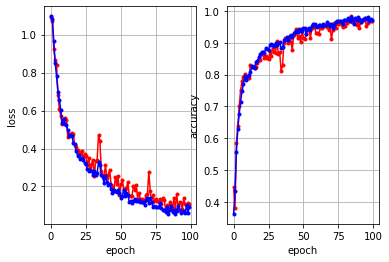

In [106]:

num_classes = 3


model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(64, 3, padding="same", activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(64, 3, padding="same", activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(64, 3, padding="same", activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(32, 3, padding="same", activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(32, 3, padding="same", activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(32, 3, padding="same", activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(32, 3, padding="same", activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
  #  layers.Dense(128, activation='relu'),
  #  layers.Dense(96, activation='relu'),
  #  layers.Dense(80, activation='relu'),
  #  layers.Dense(64, activation='relu'),
    layers.Dense(48, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),


    layers.Dense(num_classes)
    ])
  
model.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(train_ds, validation_data=val_ds, epochs=100)
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
y_acc = history.history['accuracy']
y_vacc = history.history['val_accuracy']

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(np.arange(len(y_vloss)), y_vloss, marker='.', c='red')
ax1.plot(np.arange(len(y_loss)), y_loss, marker='.', c='blue')
ax1.grid()
plt.setp(ax1, xlabel='epoch', ylabel='loss')

ax2.plot(np.arange(len(y_vacc)), y_vacc, marker='.', c='red')
ax2.plot(np.arange(len(y_acc)), y_acc, marker='.', c='blue')
ax2.grid()
plt.setp(ax2, xlabel='epoch', ylabel='accuracy')

plt.show()

# hwk_3



In [28]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import PIL.Image
from google.colab import drive
import tensorflow_datasets as tfds
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [29]:
drive.mount('/content/drive')
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
fid = drive.ListFile({'q':"title='data_3.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('data_3.zip')

In [36]:
!unzip data_3.zip

Archive:  data_3.zip
replace __MACOSX/._blotch? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: __MACOSX/._blotch       
  inflating: blotch/blotch (60).JPG  
  inflating: __MACOSX/blotch/._blotch (60).JPG  
  inflating: blotch/blotch (37).JPG  
  inflating: __MACOSX/blotch/._blotch (37).JPG  
  inflating: blotch/blotch (21).JPG  
  inflating: __MACOSX/blotch/._blotch (21).JPG  
  inflating: blotch/blotch (76).jpg  
  inflating: __MACOSX/blotch/._blotch (76).jpg  
  inflating: blotch/blotch (3).JPG   
  inflating: __MACOSX/blotch/._blotch (3).JPG  
  inflating: blotch/blotch (56).JPG  
  inflating: __MACOSX/blotch/._blotch (56).JPG  
  inflating: blotch/blotch (40).JPG  
  inflating: __MACOSX/blotch/._blotch (40).JPG  
  inflating: blotch/blotch (17).JPG  
  inflating: __MACOSX/blotch/._blotch (17).JPG  
  inflating: blotch/blotch (16).JPG  
  inflating: __MACOSX/blotch/._blotch (16).JPG  
  inflating: blotch/blotch (41).JPG  
  inflating: __MACOSX/blotch/._blotch (41).JPG  
  inf

In [109]:
data_dir = '/content/data_3'
data_dir = pathlib.Path(data_dir)

In [110]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(256, 256),
  batch_size=64
)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(256, 256),
  batch_size=64
)

Found 320 files belonging to 4 classes.
Using 256 files for training.
Found 320 files belonging to 4 classes.
Using 64 files for validation.


In [39]:
class_names = train_ds.class_names
print(class_names)

['blotch', 'normal', 'rot', 'scab']


In [111]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [112]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.99992657


In [114]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Epoch 1/100
4/4 [==============================] - 3s 426ms/step - loss: 1.3922 - accuracy: 0.2305 - val_loss: 1.3883 - val_accuracy: 0.2031
Epoch 2/100
4/4 [==============================] - 1s 354ms/step - loss: 1.3818 - accuracy: 0.2773 - val_loss: 1.3862 - val_accuracy: 0.2031
Epoch 3/100
4/4 [==============================] - 1s 358ms/step - loss: 1.3762 - accuracy: 0.3164 - val_loss: 1.3769 - val_accuracy: 0.3750
Epoch 4/100
4/4 [==============================] - 1s 355ms/step - loss: 1.3813 - accuracy: 0.3203 - val_loss: 1.3793 - val_accuracy: 0.2656
Epoch 5/100
4/4 [==============================] - 1s 354ms/step - loss: 1.3679 - accuracy: 0.3477 - val_loss: 1.3754 - val_accuracy: 0.2344
Epoch 6/100
4/4 [==============================] - 1s 356ms/step - loss: 1.3664 - accuracy: 0.3242 - val_loss: 1.3667 - val_accuracy: 0.3438
Epoch 7/100
4/4 [==============================] - 1s 357ms/step - loss: 1.3395 - accuracy: 0.3711 - val_loss: 1.3443 - val_accuracy: 0.3906
Epoch 8/100
4

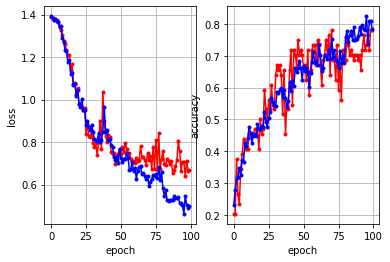

In [116]:
num_classes = 4


model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(64, 3, padding="same", activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(64, 3, padding="same", activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(64, 3, padding="same", activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(32, 3, padding="same", activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(32, 3, padding="same", activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(32, 3, padding="same", activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(32, 3, padding="same", activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
  #  layers.Dense(128, activation='relu'),
  #  layers.Dense(96, activation='relu'),
  #  layers.Dense(80, activation='relu'),
  #  layers.Dense(64, activation='relu'),
    layers.Dense(48, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),


    layers.Dense(num_classes)
    ])

model.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(train_ds, validation_data=val_ds, epochs=100)
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
y_acc = history.history['accuracy']
y_vacc = history.history['val_accuracy']

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(np.arange(len(y_vloss)), y_vloss, marker='.', c='red')
ax1.plot(np.arange(len(y_loss)), y_loss, marker='.', c='blue')
ax1.grid()
plt.setp(ax1, xlabel='epoch', ylabel='loss')

ax2.plot(np.arange(len(y_vacc)), y_vacc, marker='.', c='red')
ax2.plot(np.arange(len(y_acc)), y_acc, marker='.', c='blue')
ax2.grid()
plt.setp(ax2, xlabel='epoch', ylabel='accuracy')

plt.show()
